Tingkat Akurasi: 0.5333333333333333


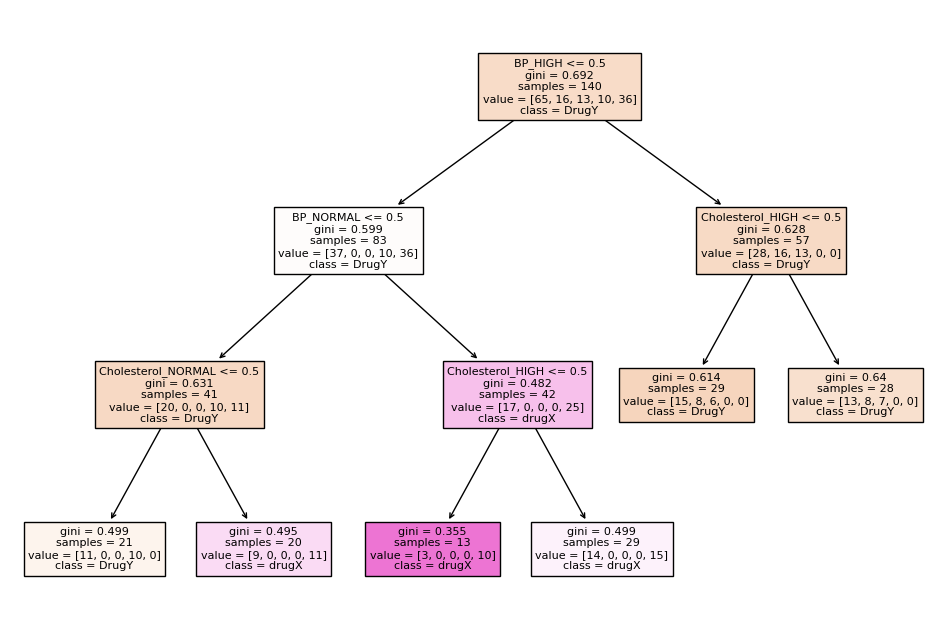

Obat: ['drugX']


In [32]:
import numpy as np
import matplotlib.pyplot as plt
import os
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn import metrics

# Memasukan dataset dari file drug200.csv
dataset = pd.read_csv('drug200.csv')

# Preprocess data
dataset = pd.get_dummies(dataset, columns=['BP', 'Cholesterol'])

# Menentukan feature column(parameter) dan target yang dicari
feature_cols = ['BP_HIGH', 'BP_LOW', 'BP_NORMAL', 'Cholesterol_HIGH', 'Cholesterol_NORMAL']
X = dataset[feature_cols]
y = dataset['Drug']

# Memisahkan data menjadi data training dan test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Membuat Decision Tree dan melatihnya
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

# Membuat prediksi berdasarkan data
y_pred = clf.predict(X_test)

# Evaluasi Model berdasarkan keakurasian
accuracy = metrics.accuracy_score(y_test, y_pred)
print("Tingkat Akurasi:", accuracy)

# Visualize the decision tree
plt.figure(figsize=(12, 8))
plot_tree(clf, filled=True, feature_names=X.columns, class_names=clf.classes_)
plt.show()

# Predict the drugs for a new set of data
new_data = pd.DataFrame({'BP_HIGH': [0], 'BP_LOW': [1], 'BP_NORMAL': [0], 'Cholesterol_HIGH': [1], 'Cholesterol_NORMAL': [1]})
predicted_drugs = clf.predict(new_data)
print("Obat:", predicted_drugs)
